# Proyecto de telecomunicasiones

precentacion 
https://1drv.ms/p/c/0b17036db48ed9cc/EdwiOMaegsxCkZsrWOMoSxQBLKDpxJ8wvp3zgO1ePXAZPQ?e=OgHOq3

# Objetivo¶

###### Creación de nueva función de apoyó a supervisores para identificar operadores poco eficaces 

## Tratamiento de datos 

### Análisis exploratorio de datos 

#### Importacion de librerías 

In [1]:
# importar librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import datetime
import scipy.stats as stats
import math

#### Cargar datos.

In [2]:
# descargar datos
tel_df = pd.read_csv('./datasets/telecom_dataset_us.csv')
clientes_df= pd.read_csv('./datasets/telecom_clients_us.csv')

#### Obtencion de información básica de datos: info(), head(). para tener una visión clara .


In [3]:
# obtener información de datos principales
print(tel_df.info())
print()
tel_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None



,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


In [4]:
# obtención de datos de clientes
print(clientes_df.info())
print()
clientes_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None



,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


#### Cambio de tipos de dato y renombracion de columnas deacuerdo a necesidades.


In [5]:
# convertir columna a formato fecha y tiempo
tel_df['date']= pd.to_datetime(tel_df['date'])
# cambio de columna a boleano
tel_df['internal']= tel_df['internal'].astype(bool)

In [6]:
# extracion y conversion solo defecha en nueva columna
tel_df['date_dt'] = tel_df['date'].dt.date
tel_df['date_dt'] = pd.to_datetime(tel_df['date_dt'] )

In [7]:
# convercion a dato de fecha
clientes_df['date_start'] = pd.to_datetime(clientes_df['date_start'])

In [8]:
# comprovacion de cambios
print(tel_df.info())
print()
print(tel_df.head())
print()
print(clientes_df.info())
print()
print(clientes_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53902 non-null  bool                                 
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
 9   date_d

####  Identificacion de datos nulos y duplicados.

In [9]:
# datos nulos y duplicados en df principal
print(tel_df.isna().sum())
print()
print(tel_df.duplicated().sum())

user_id                   0
date                      0
direction                 0
internal                  0
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
date_dt                   0
dtype: int64

4900


In [10]:
# datos nulos y duplicados en df de clientes
print(clientes_df.isna().sum())
print()
print(clientes_df.duplicated().sum())

user_id        0
tariff_plan    0
date_start     0
dtype: int64

0


#### Obtención de metricas basicas con describe().


In [11]:
print(tel_df.describe())

             user_id    operator_id   calls_count  call_duration  \
count   53902.000000   45730.000000  53902.000000   53902.000000   
mean   167295.344477  916535.993002     16.451245     866.684427   
std       598.883775   21254.123136     62.917170    3731.791202   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166782.000000  900788.000000      1.000000       0.000000   
50%    167162.000000  913938.000000      4.000000      38.000000   
75%    167819.000000  937708.000000     12.000000     572.000000   
max    168606.000000  973286.000000   4817.000000  144395.000000   

       total_call_duration  
count         53902.000000  
mean           1157.133297  
std            4403.468763  
min               0.000000  
25%              47.000000  
50%             210.000000  
75%             902.000000  
max          166155.000000  


####  Tratamiento de datos nulos y duplicados.

In [12]:
tel_df['operator_id'].unique()

array([    nan, 880022., 880020., ..., 952916., 959118., 957922.])

In [13]:
print(tel_df['user_id'].duplicated().sum())
print(tel_df['date'].duplicated().sum())
print(tel_df['direction'].duplicated().sum())
print(tel_df['internal'].duplicated().sum())
print(tel_df['operator_id'].duplicated().sum())
print(tel_df['is_missed_call'].duplicated().sum())
print(tel_df['calls_count'].duplicated().sum())
print(tel_df['call_duration'].duplicated().sum())
print(tel_df['total_call_duration'].duplicated().sum())

53595
53783
53900
53900
52809
53900
53400
48529
47862


In [14]:
print(tel_df[tel_df.duplicated()])

       user_id                      date direction  internal  operator_id  \
8       166377 2019-08-05 00:00:00+03:00       out     False     880020.0   
28      166377 2019-08-12 00:00:00+03:00        in     False          NaN   
44      166377 2019-08-14 00:00:00+03:00       out     False     880026.0   
45      166377 2019-08-14 00:00:00+03:00        in     False          NaN   
51      166377 2019-08-15 00:00:00+03:00       out     False     880026.0   
...        ...                       ...       ...       ...          ...   
53869   168601 2019-11-25 00:00:00+03:00        in     False     952914.0   
53874   168601 2019-11-26 00:00:00+03:00        in     False     952914.0   
53875   168601 2019-11-26 00:00:00+03:00        in     False          NaN   
53885   168603 2019-11-20 00:00:00+03:00       out     False     959118.0   
53900   168606 2019-11-15 00:00:00+03:00       out      True     957922.0   

       is_missed_call  calls_count  call_duration  total_call_duration  \
8

In [15]:
print(tel_df['date_dt'].min())
print(tel_df['date_dt'].max())

2019-08-02 00:00:00
2019-11-28 00:00:00


###### º En este caso no eliminaré ni sustituire los valores nulos y duplicados dado que :
Los nulos es imposible saber el operador, solo los omitire.

Los duplicados existen en las columnas de difente forma por ejemplo en los usuarios por la realizacion de diferentes llamadas en diferentes momentos, es decir se duplican pero no en totalidad.

## Identificar operadores eficaces e ineficaces 

### Comparar rendimiento entre los operadores.

In [16]:
# obteniendo el tiempo de espera por cada llamada
tel_df['on_time_hold'] = tel_df['total_call_duration']- tel_df['call_duration']

In [17]:
# tasa de llamadas perdidas
tel_df['tasa_de_llamadas_perdidas']=tel_df['is_missed_call']/tel_df['calls_count']
# tiempo de espera promedio
tel_df['tiempo_espera_promedio']= tel_df['on_time_hold'].mean()
# eficasia en las llamadas
tel_df['eficiencia_manejo_de_llamadas']=tel_df['call_duration']/tel_df['total_call_duration']
#calidad delservicio
tel_df['calidad_del_servicio']=(tel_df['call_duration']/tel_df['total_call_duration'])*(1-tel_df['tasa_de_llamadas_perdidas'])

In [18]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype                                
---  ------                         --------------  -----                                
 0   user_id                        53902 non-null  int64                                
 1   date                           53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction                      53902 non-null  object                               
 3   internal                       53902 non-null  bool                                 
 4   operator_id                    45730 non-null  float64                              
 5   is_missed_call                 53902 non-null  bool                                 
 6   calls_count                    53902 non-null  int64                                
 7   call_duration                  53902 non-null  int64                        

In [19]:
tel_df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,date_dt,on_time_hold,tasa_de_llamadas_perdidas,tiempo_espera_promedio,eficiencia_manejo_de_llamadas,calidad_del_servicio
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,2019-08-04,4,0.500000,290.44887,0.000000,0.000000
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,2019-08-05,5,0.333333,290.44887,0.000000,0.000000
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,2019-08-05,1,1.000000,290.44887,0.000000,0.000000
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,2019-08-05,8,0.000000,290.44887,0.555556,0.555556
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,2019-08-05,25,0.333333,290.44887,0.000000,0.000000


In [20]:
tel_df['on_time_hold'].describe()

count    53902.000000
mean       290.448870
std       1127.905654
min          0.000000
25%         17.000000
50%         55.000000
75%        201.000000
max      46474.000000
Name: on_time_hold, dtype: float64

In [21]:
# porcentaje en tiempo de espera por operador
porcentaje_de_llamadas_espera = tel_df.groupby('operator_id')['on_time_hold'].sum()/tel_df.groupby('operator_id')['total_call_duration'].sum()*100

In [22]:
llamadas_porcentaje_espera= porcentaje_de_llamadas_espera.sort_values(ascending= False).reset_index()
llamadas_porcentaje_espera.columns= ['operator_id', 'porcentaje_espera']

In [65]:
llamadas_porsentaje_espera_ = llamadas_porcentaje_espera.groupby('porcentaje_espera')['operator_id'].count()
llamadas_porsentaje_espera_ = llamadas_porsentaje_espera_.sort_values(ascending = False).reset_index()
llamadas_porsentaje_espera_

,porcentaje_espera,operator_id
0,100.000000,29
1,8.333333,3
2,60.000000,2
3,31.481481,2
4,80.000000,2
...,...,...
1045,15.730337,1
1046,15.734967,1
1047,15.756969,1
1048,15.835910,1


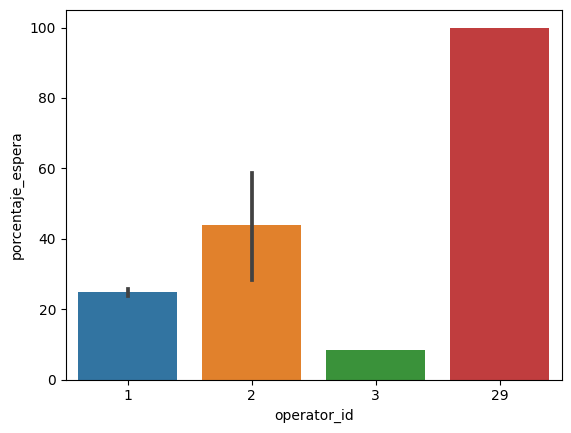

In [24]:
sns.barplot(x='operator_id', y='porcentaje_espera', data=llamadas_porcentaje_espera_)
plt.show()

Esta gráfica  no me dice mucho solo que tenemos 29 operadores con el 100% de llamadas en espera. existen grupos de 3 con menor porcentaje del 20 porciento 

In [25]:
# total de llamadas perdidas por operador
llamadas_perdidas = tel_df.groupby('operator_id')['is_missed_call'].sum()

In [26]:
print(llamadas_perdidas.sort_values(ascending= False))

operator_id
885876.0    135
891410.0    131
893804.0    130
901880.0    128
891414.0    126
           ... 
930510.0      0
930326.0      0
930264.0      0
929340.0      0
973286.0      0
Name: is_missed_call, Length: 1092, dtype: int64


In [27]:
# porcentaje de llamadas perdidas por operador
porcentaje_llamadas_perdidas= (tel_df.groupby('operator_id')['is_missed_call'].sum()/tel_df.groupby('operator_id')['is_missed_call'].count())*100
porcentaje_llamadas_perdidas=porcentaje_llamadas_perdidas.sort_values(ascending= False).reset_index()
porcentaje_llamadas_perdidas.columns=['operator_id', 'porcentaje_perdidas']
porcentaje_llamadas_perdidas

,operator_id,porcentaje_perdidas
0,932246.0,100.0
1,937770.0,100.0
2,970258.0,100.0
3,914626.0,100.0
4,937710.0,100.0
...,...,...
1087,930510.0,0.0
1088,930326.0,0.0
1089,930264.0,0.0
1090,929340.0,0.0


In [28]:
porcentaje_llamadas_perdidas_= porcentaje_llamadas_perdidas.groupby('porcentaje_perdidas')['operator_id'].count()
porcentaje_llamadas_perdidas_ = porcentaje_llamadas_perdidas_.sort_values(ascending= False).reset_index()
porcentaje_llamadas_perdidas_

,porcentaje_perdidas,operator_id
0,0.000000,216
1,50.000000,67
2,33.333333,48
3,100.000000,34
4,40.000000,23
...,...,...
413,32.075472,1
414,32.038835,1
415,32.000000,1
416,31.967213,1


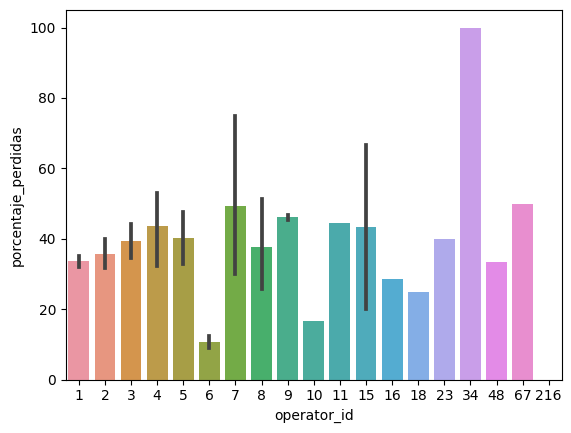

In [29]:
sns.barplot(x='operator_id', y='porcentaje_perdidas', data=porcentaje_llamadas_perdidas_)
plt.show()

En esta gráfica podemos ver que existen operadores con un  100% en valor de porcentaje de llamadas perdidas que son 34 y 216 que no tienen llamadas perdidas. podriamos catalogarlos como eficaces , más  sin embargo necesitamos analisar a fondo. 

In [67]:
df_tendensia = tel_df.groupby(pd.Grouper(key= 'date_dt', freq= 'M'))[['is_missed_call', 'on_time_hold']].mean()

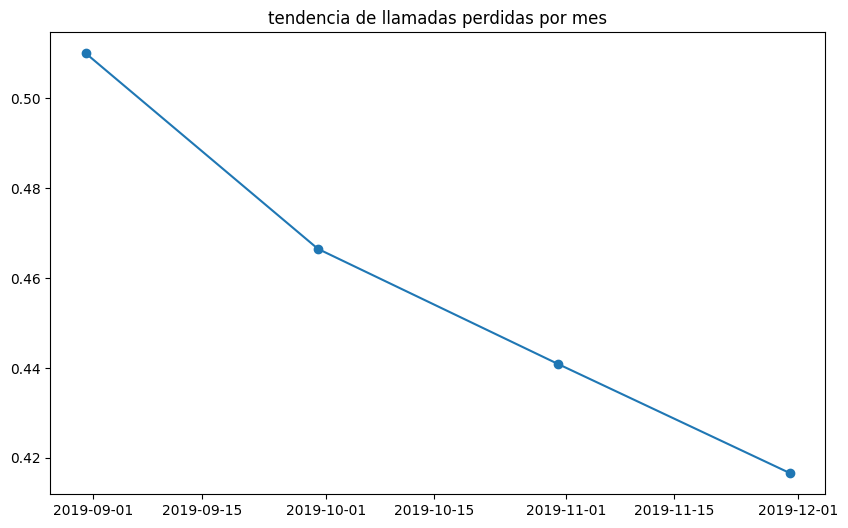

In [69]:
plt.figure(figsize=(10,6))
plt.plot(df_tendensia.index, df_tendensia['is_missed_call'], marker= 'o')
plt.title('tendencia de llamadas perdidas por mes')
plt.show()


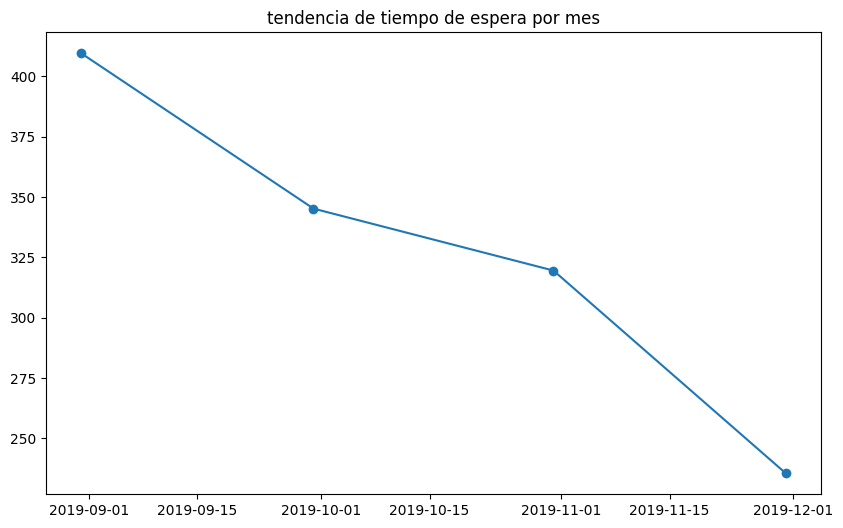

In [70]:
plt.figure(figsize=(10,6))
plt.plot(df_tendensia.index, df_tendensia['on_time_hold'], marker= 'o')
plt.title('tendencia de tiempo de espera por mes')
plt.show()

En las tendencias tanto de llamadas perdidas, como tiempo de espera tenemos que al empresar el periodo el indice es alto, sin embargo al llegar al mes de diciembre se reducen significativamente, de duciendo que los operadores ineficaces an mejorado. mas no es una resolucion absoluta.

### definir criterios de evaluación para los operadores.

Mayor porcentaje de llamadas perdidas y mayor porcentaje en tiempo de llamadas en espera

## Prueva hipótesis 

### Obtención de metricas de rendimiento y generacion de hipótesis.

A. diferencia de rendimiento de los operadores en las metricas de eficasia e llamadas perdidas.


hipótesis: las llamadas perdidas dependen del si son salientes o entrantes

In [30]:
llamadas_a1= tel_df.query('direction == "in"')['calls_count']
llamadas_a2= tel_df.query('direction == "out"')['calls_count']

In [31]:
alpha = 0.05

results = stats.ttest_ind(
    llamadas_a1, 
    llamadas_a2, equal_var=False )
print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
        print("Rechazamos la hipótesis nula")
else:
        print("No podemos rechazar la hipótesis nula")
   

valor p:  3.3628526819119304e-101
Rechazamos la hipótesis nula


hipótesis: el tiempo de llamadas en esperas es mayor para llamadas salientes o entrantes

In [32]:
llamadas_1= tel_df.query('direction == "in"')['on_time_hold']
llamadas_2= tel_df.query('direction == "out"')['on_time_hold']

In [33]:
alpha = 0.05

results = stats.ttest_ind(
    llamadas_1, 
    llamadas_2, equal_var=False )
print('valor p: ', results.pvalue)

if (results.pvalue < alpha):
        print("Rechazamos la hipótesis nula")
else:
        print("No podemos rechazar la hipótesis nula")
   

valor p:  2.9592372960801155e-235
Rechazamos la hipótesis nula


hipótesis: la tasa de llamadas perdidas es significativamente diferente entre los operadores

In [38]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype                                
---  ------                         --------------  -----                                
 0   user_id                        53902 non-null  int64                                
 1   date                           53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction                      53902 non-null  object                               
 3   internal                       53902 non-null  bool                                 
 4   operator_id                    45730 non-null  float64                              
 5   is_missed_call                 53902 non-null  bool                                 
 6   calls_count                    53902 non-null  int64                                
 7   call_duration                  53902 non-null  int64                        

In [40]:
agrupacion_df = tel_df.groupby('operator_id')['is_missed_call'].agg(['mean', 'std'])
agrupacion_df 

,mean,std
operator_id,,
879896.0,0.390625,0.489808
879898.0,0.398406,0.490548
880020.0,0.318182,0.476731
880022.0,0.434211,0.498946
880026.0,0.474747,0.500628
...,...,...
972410.0,0.500000,0.577350
972412.0,0.400000,0.547723
972460.0,0.333333,0.500000


In [57]:
umbral_eficiencia = 0.4
agrupacion_df ['eficaces']= agrupacion_df['mean'] < umbral_eficiencia
operadores_eficaces= agrupacion_df[agrupacion_df['eficaces']==True] 
operadores_ineficaces= agrupacion_df[agrupacion_df['eficaces']==False]

In [58]:
operadores_eficaces

,mean,std,eficaces
operator_id,,,
879896.0,0.390625,0.489808,True
879898.0,0.398406,0.490548,True
880020.0,0.318182,0.476731,True
882476.0,0.000000,0.000000,True
882478.0,0.333333,0.577350,True
...,...,...,...
971100.0,0.000000,0.000000,True
971102.0,0.000000,0.000000,True
971354.0,0.000000,0.000000,True


In [59]:
operadores_ineficaces

,mean,std,eficaces
operator_id,,,
880022.0,0.434211,0.498946,False
880026.0,0.474747,0.500628,False
880028.0,0.402655,0.491521,False
880240.0,0.571429,0.513553,False
881278.0,0.875000,0.353553,False
...,...,...,...
970486.0,0.500000,0.577350,False
972408.0,0.666667,0.577350,False
972410.0,0.500000,0.577350,False


In [61]:
t_stat, p_valor= stats.ttest_ind(operadore_eficaces['mean'],operadores_ineficaces['mean'])
print(f't-estadistica:{t_stat}')
print(f'p-valor:{p_valor}')
if (results.pvalue < umbral_eficiencia):
        print("Rechazamos la hipótesis nula")
else:
        print("No podemos rechazar la hipótesis nula")
   

t-estadistica:-37.55250409030997
p-valor:1.0215591302965018e-198
Rechazamos la hipótesis nula


In [37]:
# variables
alpha= 0.05 
grupos= tel_df.groupby('operator_id')['tasa_de_llamadas_perdidas']
for nombre_grupo, grupo in grupos:
    resto= tel_df[tel_df['operator_id']!= nombre_grupo]['tasa_de_llamadas_perdidas']
    if grupo.var() !=0 and resto.var()!=0:
        if len(grupo) >1 and len(resto) > 1:
            t_stat,p_valor= stats.ttest_ind(grupo,resto)
    if p_valor < alpha:
        print(f'Operador{nombre_grupo}:Rechaza la hipotesis nula (p_valor={p_valor:.4f})')
    else:
        print(f'Operador{nombre_grupo}:Acepta la hipotesis nula (p_valor={p_valor:.4f})')
    
    print(f't-estadistica:{t_stat}')
    print(f'p-valor:{p_valor}')
    print('---')

Operador879896.0:Acepta la hipotesis nula (p_valor=0.2064)
t-estadistica:1.263486690228397
p-valor:0.20641979173393224
---
Operador879898.0:Rechaza la hipotesis nula (p_valor=0.0000)
t-estadistica:-5.6687010759700796
p-valor:1.4461720033375738e-08
---
Operador880020.0:Acepta la hipotesis nula (p_valor=0.3193)
t-estadistica:-0.9959217613871538
p-valor:0.31929263190668816
---
Operador880022.0:Acepta la hipotesis nula (p_valor=0.5201)
t-estadistica:0.6431924563094925
p-valor:0.5201019638448643
---
Operador880026.0:Rechaza la hipotesis nula (p_valor=0.0149)
t-estadistica:-2.4343293556694303
p-valor:0.014922636532406105
---
Operador880028.0:Rechaza la hipotesis nula (p_valor=0.0000)
t-estadistica:-5.5358277423654005
p-valor:3.112009201367754e-08
---
Operador880240.0:Rechaza la hipotesis nula (p_valor=0.0078)
t-estadistica:2.659127479016345
p-valor:0.007836646343150072
---
Operador881278.0:Rechaza la hipotesis nula (p_valor=0.0180)
t-estadistica:2.364869211885514
p-valor:0.018039960895838432

Operador893402.0:Rechaza la hipotesis nula (p_valor=0.0013)
t-estadistica:-3.2262335606762305
p-valor:0.0012550578910414494
---
Operador893420.0:Acepta la hipotesis nula (p_valor=0.3373)
t-estadistica:-0.9595591243526795
p-valor:0.33728145382447783
---
Operador893674.0:Rechaza la hipotesis nula (p_valor=0.0002)
t-estadistica:-3.732718274261511
p-valor:0.0001896189894371308
---
Operador893700.0:Acepta la hipotesis nula (p_valor=0.5116)
t-estadistica:-0.656313969345502
p-valor:0.5116249329741105
---
Operador893804.0:Rechaza la hipotesis nula (p_valor=0.0434)
t-estadistica:-2.0198134517203377
p-valor:0.04340767936283796
---
Operador894120.0:Acepta la hipotesis nula (p_valor=0.3103)
t-estadistica:-1.014546679284974
p-valor:0.3103265214892171
---
Operador894224.0:Acepta la hipotesis nula (p_valor=0.9779)
t-estadistica:-0.027656815783883452
p-valor:0.9779359689184277
---
Operador894226.0:Rechaza la hipotesis nula (p_valor=0.0286)
t-estadistica:2.1888426756296275
p-valor:0.02861255149738031
-

Operador902608.0:Acepta la hipotesis nula (p_valor=0.5508)
t-estadistica:-0.5965806707895056
p-valor:0.5507898850493274
---
Operador902720.0:Rechaza la hipotesis nula (p_valor=0.0009)
t-estadistica:-3.3146671536725756
p-valor:0.0009181280090771938
---
Operador902742.0:Rechaza la hipotesis nula (p_valor=0.0443)
t-estadistica:-2.011355323193577
p-valor:0.04429290715373802
---
Operador902744.0:Acepta la hipotesis nula (p_valor=0.1744)
t-estadistica:-1.3580834578567278
p-valor:0.17444288818241258
---
Operador902746.0:Acepta la hipotesis nula (p_valor=0.8076)
t-estadistica:-0.24352457861520685
p-valor:0.8075999739002662
---
Operador902748.0:Acepta la hipotesis nula (p_valor=0.4658)
t-estadistica:-0.7293517806570319
p-valor:0.4657896748107653
---
Operador902774.0:Acepta la hipotesis nula (p_valor=0.7098)
t-estadistica:-0.37213257740206274
p-valor:0.7097956050735448
---
Operador902776.0:Acepta la hipotesis nula (p_valor=0.5308)
t-estadistica:-0.6268652905026063
p-valor:0.5307501961111508
---


Operador908960.0:Rechaza la hipotesis nula (p_valor=0.0268)
t-estadistica:-2.2143897281997047
p-valor:0.026806148428081995
---
Operador908984.0:Acepta la hipotesis nula (p_valor=0.6695)
t-estadistica:-0.4268749093406327
p-valor:0.6694721465094166
---
Operador909134.0:Rechaza la hipotesis nula (p_valor=0.0083)
t-estadistica:-2.637815234524686
p-valor:0.008346598908712765
---
Operador909308.0:Acepta la hipotesis nula (p_valor=0.6388)
t-estadistica:0.469311416340569
p-valor:0.6388489545246963
---
Operador909392.0:Acepta la hipotesis nula (p_valor=0.6388)
t-estadistica:0.469311416340569
p-valor:0.6388489545246963
---
Operador909452.0:Acepta la hipotesis nula (p_valor=0.6388)
t-estadistica:0.469311416340569
p-valor:0.6388489545246963
---
Operador909502.0:Acepta la hipotesis nula (p_valor=0.1227)
t-estadistica:-1.5437086831611004
p-valor:0.12266479254084932
---
Operador909624.0:Acepta la hipotesis nula (p_valor=0.1227)
t-estadistica:-1.5437086831611004
p-valor:0.12266479254084932
---
Operado

Operador919164.0:Rechaza la hipotesis nula (p_valor=0.0461)
t-estadistica:1.994923502530527
p-valor:0.04605624997361374
---
Operador919166.0:Acepta la hipotesis nula (p_valor=0.2970)
t-estadistica:1.0428924955814316
p-valor:0.29700276306902107
---
Operador919188.0:Acepta la hipotesis nula (p_valor=0.7511)
t-estadistica:-0.31725112261317306
p-valor:0.751054290400576
---
Operador919190.0:Acepta la hipotesis nula (p_valor=0.2077)
t-estadistica:-1.2599301267731111
p-valor:0.20770002462939569
---
Operador919192.0:Rechaza la hipotesis nula (p_valor=0.0377)
t-estadistica:-2.0777237866486855
p-valor:0.03773952899375074
---
Operador919194.0:Rechaza la hipotesis nula (p_valor=0.0208)
t-estadistica:-2.3115435210681783
p-valor:0.020806604027176996
---
Operador919196.0:Rechaza la hipotesis nula (p_valor=0.0009)
t-estadistica:-3.311553000813316
p-valor:0.0009284062409172537
---
Operador919198.0:Rechaza la hipotesis nula (p_valor=0.0159)
t-estadistica:-2.4116701003858
p-valor:0.015882963119141343
---

Operador924936.0:Acepta la hipotesis nula (p_valor=0.4215)
t-estadistica:-0.8038336882296576
p-valor:0.42149657603290236
---
Operador924940.0:Acepta la hipotesis nula (p_valor=0.0988)
t-estadistica:1.6505594557674517
p-valor:0.09883438969500202
---
Operador924946.0:Acepta la hipotesis nula (p_valor=0.5188)
t-estadistica:0.6451428988646702
p-valor:0.5188373318514675
---
Operador924948.0:Acepta la hipotesis nula (p_valor=0.6437)
t-estadistica:0.46258211125670134
p-valor:0.6436658008526194
---
Operador924950.0:Acepta la hipotesis nula (p_valor=0.0989)
t-estadistica:1.650467216026262
p-valor:0.0988532395852945
---
Operador924952.0:Acepta la hipotesis nula (p_valor=0.6962)
t-estadistica:-0.3904786434553356
p-valor:0.6961841876555054
---
Operador924954.0:Acepta la hipotesis nula (p_valor=0.1396)
t-estadistica:1.477358516531408
p-valor:0.13958540256586896
---
Operador924956.0:Acepta la hipotesis nula (p_valor=0.9335)
t-estadistica:0.08343612471910468
p-valor:0.9335050751138383
---
Operador924

Operador934098.0:Acepta la hipotesis nula (p_valor=0.1774)
t-estadistica:1.3488211256600726
p-valor:0.1774000940971558
---
Operador934170.0:Acepta la hipotesis nula (p_valor=0.1774)
t-estadistica:1.3488211256600726
p-valor:0.1774000940971558
---
Operador934188.0:Acepta la hipotesis nula (p_valor=0.9733)
t-estadistica:0.03348242850570039
p-valor:0.9732900019761725
---
Operador934424.0:Acepta la hipotesis nula (p_valor=0.9733)
t-estadistica:0.03348242850570039
p-valor:0.9732900019761725
---
Operador934426.0:Acepta la hipotesis nula (p_valor=0.2172)
t-estadistica:-1.234021267515469
p-valor:0.21720035993028253
---
Operador934428.0:Acepta la hipotesis nula (p_valor=0.2172)
t-estadistica:-1.234021267515469
p-valor:0.21720035993028253
---
Operador934430.0:Acepta la hipotesis nula (p_valor=0.0910)
t-estadistica:-1.6901709201317234
p-valor:0.0910010425152464
---
Operador934432.0:Acepta la hipotesis nula (p_valor=0.0910)
t-estadistica:-1.6901709201317234
p-valor:0.0910010425152464
---
Operador93

Operador939476.0:Acepta la hipotesis nula (p_valor=0.0690)
t-estadistica:-1.818742855974682
p-valor:0.068956216869289
---
Operador939478.0:Acepta la hipotesis nula (p_valor=0.8608)
t-estadistica:0.17532534928568272
p-valor:0.8608246529863215
---
Operador939684.0:Rechaza la hipotesis nula (p_valor=0.0356)
t-estadistica:2.1015385508378386
p-valor:0.03559834701873769
---
Operador939698.0:Rechaza la hipotesis nula (p_valor=0.0356)
t-estadistica:2.1015385508378386
p-valor:0.03559834701873769
---
Operador939706.0:Rechaza la hipotesis nula (p_valor=0.0209)
t-estadistica:-2.310744685486294
p-valor:0.020850716761953148
---
Operador939708.0:Acepta la hipotesis nula (p_valor=0.5213)
t-estadistica:-0.6413698859008646
p-valor:0.5212851206869487
---
Operador939716.0:Rechaza la hipotesis nula (p_valor=0.0442)
t-estadistica:2.0119520108212146
p-valor:0.04422996217631518
---
Operador939718.0:Acepta la hipotesis nula (p_valor=0.2677)
t-estadistica:1.1083664176915125
p-valor:0.26770854767204455
---
Opera

Operador945298.0:Acepta la hipotesis nula (p_valor=0.0654)
t-estadistica:-1.842349227958513
p-valor:0.06542957236479435
---
Operador945302.0:Rechaza la hipotesis nula (p_valor=0.0000)
t-estadistica:-4.700422678160691
p-valor:2.6026431571276043e-06
---
Operador945304.0:Rechaza la hipotesis nula (p_valor=0.0004)
t-estadistica:-3.565730129491644
p-valor:0.0003631585370973086
---
Operador945308.0:Rechaza la hipotesis nula (p_valor=0.0023)
t-estadistica:-3.0432854867934553
p-valor:0.0023412287554578073
---
Operador945310.0:Rechaza la hipotesis nula (p_valor=0.0001)
t-estadistica:-3.832033129419496
p-valor:0.00012723272070971174
---
Operador945312.0:Rechaza la hipotesis nula (p_valor=0.0003)
t-estadistica:-3.6140841722446146
p-valor:0.00030168539743443426
---
Operador945314.0:Rechaza la hipotesis nula (p_valor=0.0207)
t-estadistica:-2.314345028132292
p-valor:0.02065254347490063
---
Operador945316.0:Rechaza la hipotesis nula (p_valor=0.0001)
t-estadistica:-3.995950169006082
p-valor:6.45208757

Operador952734.0:Acepta la hipotesis nula (p_valor=0.7073)
t-estadistica:-0.37555193041181795
p-valor:0.7072515107452219
---
Operador952914.0:Acepta la hipotesis nula (p_valor=0.0686)
t-estadistica:-1.8212622156341183
p-valor:0.068572547865108
---
Operador952916.0:Acepta la hipotesis nula (p_valor=0.9733)
t-estadistica:0.03348242850570039
p-valor:0.9732900019761725
---
Operador952948.0:Acepta la hipotesis nula (p_valor=0.3772)
t-estadistica:0.8830977192073224
p-valor:0.3771874149518404
---
Operador952954.0:Acepta la hipotesis nula (p_valor=0.3772)
t-estadistica:0.8830977192073224
p-valor:0.3771874149518404
---
Operador952968.0:Acepta la hipotesis nula (p_valor=0.3772)
t-estadistica:0.8830977192073224
p-valor:0.3771874149518404
---
Operador952982.0:Acepta la hipotesis nula (p_valor=0.3772)
t-estadistica:0.8830977192073224
p-valor:0.3771874149518404
---
Operador953362.0:Acepta la hipotesis nula (p_valor=0.8681)
t-estadistica:-0.16612662995652105
p-valor:0.8680579207649057
---
Operador953

Operador969262.0:Rechaza la hipotesis nula (p_valor=0.0310)
t-estadistica:-2.1574571588613756
p-valor:0.030974466320775638
---
Operador969268.0:Rechaza la hipotesis nula (p_valor=0.0310)
t-estadistica:-2.1574571588613756
p-valor:0.030974466320775638
---
Operador969272.0:Acepta la hipotesis nula (p_valor=0.4717)
t-estadistica:-0.7196919714412886
p-valor:0.4717177910387621
---
Operador969284.0:Acepta la hipotesis nula (p_valor=0.4717)
t-estadistica:-0.7196919714412886
p-valor:0.4717177910387621
---
Operador969286.0:Acepta la hipotesis nula (p_valor=0.4895)
t-estadistica:0.6911434578569191
p-valor:0.4894783689427912
---
Operador969288.0:Acepta la hipotesis nula (p_valor=0.8856)
t-estadistica:-0.14386853794795804
p-valor:0.8856048181103322
---
Operador969294.0:Acepta la hipotesis nula (p_valor=0.6968)
t-estadistica:0.38961926782152895
p-valor:0.6968196416552013
---
Operador969380.0:Acepta la hipotesis nula (p_valor=0.6116)
t-estadistica:-0.5077341669438004
p-valor:0.6116418613827046
---
Op

## Concluciones

En cuestión de llamadas perdidas contamos con 34 operadores con el mayor porsentaje en ellas.

En cuestión de llamadas en espera contamos con 29 operadores que tienen el mayor porcentaje.

Tenemos un promedió de tiempo de llamadas en espera de 290.44

Las circunstancias nos dicen que la eficiencia de lo operadores no tiene relación entre las llamadas entrentes y salientes con las llamadas perdidas y el tiempo de espera.

Al realizar la prueva estadistica entre los operadores eficaces e ineficases encontramos que no 
existe diferencia estadistica entre las muestras 